# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1. Введение в PyTorch. Полносвязные нейронные сети.

### Общая информация

Дата выдачи: 06.10.2021

Мягкий дедлайн: 23:59MSK 25.10.2021

Жесткий дедлайн: 23:59MSK 28.10.2021

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов. За каждый день просрочки снимается 1 балл. Сдавать задание после жёсткого дедлайна сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит предсказывать год выпуска песни по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import random
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
#import wandb

In [2]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2021-10-27 08:12:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211011981 (201M) [application/x-httpd-php]
Saving to: 'data.txt.zip'

     0K .......... .......... .......... .......... ..........  0%  133K 25m48s
    50K .......... .......... .......... .......... ..........  0%  138K 25m19s
   100K .......... .......... .......... .......... ..........  0%  271K 21m5s
   150K .......... .......... .......... .......... ..........  0%  271K 18m58s
   200K .......... .......... .......... .......... ..........  0%  138K 20m8s
   250K .......... .......... .......... .......... ..........  0%  271K 18m53s
   300K .......... .......... .......... .......... ..........  0%  273K 17m58s
   350K .......... .......... .......... .

In [3]:
df = pd.read_csv('data.txt.zip', header=None)
df.head()

 24050K .......... .......... .......... .......... .......... 11% 4,95M 2m3s
 24100K .......... .......... .......... .......... .......... 11% 11,3M 2m2s
 24150K .......... .......... .......... .......... .......... 11% 12,2M 2m2s
 24200K .......... .......... .......... .......... .......... 11% 6,13M 2m2s
 24250K .......... .......... .......... .......... .......... 11% 12,2M 2m2s
 24300K .......... .......... .......... .......... .......... 11% 5,93M 2m2s
 24350K .......... .......... .......... .......... .......... 11% 9,73M 2m1s
 24400K .......... .......... .......... .......... .......... 11% 6,77M 2m1s
 24450K .......... .......... .......... .......... .......... 11% 12,5M 2m1s
 24500K .......... .......... .......... .......... .......... 11% 7,78M 2m1s
 24550K .......... .......... .......... .......... .......... 11% 9,02M 2m0s
 24600K .......... .......... .......... .......... .......... 11% 10,7M 2m0s
 24650K .......... .......... .......... .......... .......... 1

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [4]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

In [5]:
X_train.shape

(463715, 90)

In [6]:
X_test.shape

(51630, 90)

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [7]:
from sklearn.linear_model import Ridge, RidgeCV

# Формула ошибки
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

# Обучаю Ridge регрессию из sklearn
ridge = Ridge()
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

# Cначала просто предикт на тесте
print('RMSE for Ridge reg:', rmse(pred, y_test))

# Луший константный прогноз, он же среднее
pred_const = np.ones(y_test.shape)
pred_const = np.mean(y_test)
print('RMSE for best constant model:', rmse(pred_const, y_test))

RMSE for Ridge reg: 9.510160711373397
RMSE for best constant model: 10.851909820717683


## Задание 1. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знаете, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из ячейки ниже.



In [8]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

### Подготовка данных

В этом разделе я готовлю данные для обучения с помощью StandardScaler.

In [9]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
count,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,...,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000,463715.000000
mean,43.385488,1.261091,8.650195,1.130763,-6.512725,-9.565527,-2.384609,-1.793722,3.714584,1.872495,...,15.743361,-73.067753,41.423976,37.780868,0.345259,17.599280,-26.364826,4.444985,19.739307,1.323326
std,6.079139,51.613473,35.264750,16.334672,22.855820,12.836758,14.580245,7.961876,10.579241,6.522868,...,32.086356,175.376872,121.794610,94.874474,16.153797,114.336522,174.187892,13.320996,184.843503,22.045404
min,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,-41.631660,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-318.223330
25%,39.957540,-26.153810,-11.441920,-8.515155,-20.636960,-18.468705,-10.776340,-6.461400,-2.303600,-2.448450,...,-1.798085,-139.062035,-20.918635,-4.711470,-6.758160,-31.563615,-101.396245,-2.572830,-59.598030,-8.813335
50%,44.262570,8.371550,10.470520,-0.691610,-5.992740,-11.208850,-2.047850,-1.735440,3.816840,1.775310,...,9.161360,-52.878010,28.709870,33.494550,0.828350,15.554490,-21.123570,3.111120,7.586950,0.052840
75%,47.833650,36.143780,29.741165,8.756995,7.749590,-2.422590,6.515710,2.905130,9.950960,6.128885,...,26.248290,13.620660,89.419995,77.674700,8.495715,67.743725,52.299850,9.948955,86.203115,9.670740
max,61.970140,384.065730,322.851430,289.527430,262.068870,119.815590,172.402680,105.210280,146.297950,60.345350,...,840.973380,4469.454870,3210.701700,1672.647100,260.544900,3662.065650,2833.608950,463.419500,7393.398440,600.766240


In [10]:
y_train = y_train.astype(np.float)
pd.DataFrame(y_train).describe()

,0
count,463715.000000
mean,1998.386095
std,10.939767
min,1922.000000
25%,1994.000000
50%,2002.000000
75%,2006.000000
max,2011.000000


In [11]:
# Провожу масштабирование признаков и целевой переменной (стандартизация)

scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train.reshape(-1, 1))

X_train_std = scalerX.transform(X_train)
y_train_std = scalery.transform(y_train.reshape(-1, 1))
X_test_std = scalerX.transform(X_test)
y_test_std = scalery.transform(y_test.reshape(-1, 1))

In [12]:
pd.DataFrame(X_train_std).describe()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
count,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,...,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05,4.637150e+05
mean,-2.246695e-15,5.569616e-17,8.381589e-18,-3.894274e-17,-5.267717e-16,-1.149297e-16,-2.837214e-17,-5.128001e-17,1.951941e-16,-6.075066e-17,...,3.023817e-17,-8.455486e-17,-1.200067e-16,-5.078065e-17,2.720524e-17,3.035693e-17,-1.106802e-17,9.700097e-17,-4.249692e-17,6.300690e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-6.849083e+00,-6.555536e+00,-8.780881e+00,-9.508272e+00,-7.675981e+00,-5.626720e+00,-1.274530e+01,-8.881098e+00,-1.230653e+01,-6.669490e+00,...,-1.413267e+01,-2.468577e+01,-1.520687e+01,-3.305562e+01,-2.117983e+01,-2.786972e+01,-2.464943e+01,-1.805304e+01,-4.045652e+01,-1.449495e+01
25%,-5.638876e-01,-5.311584e-01,-5.697513e-01,-5.905186e-01,-6.179717e-01,-6.935698e-01,-5.755554e-01,-5.862542e-01,-5.688679e-01,-6.624309e-01,...,-5.466954e-01,-3.763002e-01,-5.118673e-01,-4.478800e-01,-4.397373e-01,-4.299846e-01,-4.307504e-01,-5.268242e-01,-4.292140e-01,-4.598088e-01
50%,1.442775e-01,1.377638e-01,5.161888e-02,-1.115648e-01,2.275066e-02,-1.280171e-01,2.309700e-02,7.320083e-03,9.665689e-03,-1.489907e-02,...,-2.051342e-01,1.151222e-01,-1.043898e-01,-4.517888e-02,2.990574e-02,-1.788398e-02,3.008970e-02,-1.001326e-01,-6.574410e-02,-5.763047e-02
75%,7.317100e-01,6.758454e-01,5.980758e-01,4.668744e-01,6.240130e-01,5.564446e-01,6.104375e-01,5.901695e-01,5.894924e-01,6.525343e-01,...,3.273959e-01,4.942984e-01,3.940738e-01,4.204911e-01,5.045541e-01,4.385694e-01,4.516087e-01,4.131805e-01,3.595684e-01,3.786469e-01
max,3.057122e+00,7.416766e+00,8.909792e+00,1.765551e+01,1.175114e+01,1.007897e+01,1.198797e+01,1.343956e+01,1.347767e+01,8.964296e+00,...,2.571906e+01,2.590152e+01,2.602152e+01,1.723191e+01,1.610766e+01,3.187494e+01,1.641892e+01,3.445501e+01,3.989141e+01,2.719132e+01


In [13]:
pd.DataFrame(y_train_std).describe()

,0
count,4.637150e+05
mean,-1.283998e-15
std,1.000001e+00
min,-6.982432e+00
25%,-4.009317e-01
50%,3.303461e-01
75%,6.959850e-01
max,1.153034e+00


### Модель, обучение, тест

Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться следующими сигнатурами функций. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

In [14]:
class MyDataset(torch.utils.data.Dataset):
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return torch.tensor(self.x[idx, : ], dtype=torch.float), torch.tensor(self.y[idx], dtype=torch.float)

In [15]:
set_random_seed(2)

In [16]:
train_set = MyDataset(X_train_std, y_train_std)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, drop_last=True, shuffle=True)

test_set = MyDataset(X_test_std, y_test_std)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=X_test.shape[0], shuffle=False)

model = nn.Sequential(             
    nn.Linear(90, 100),  
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 1),
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

In [17]:
#wandb.login()
#wandb.init(project="nn-hw-1")
#wandb.watch(model);

In [18]:
def train(model, optimizer, criterion, train_loader):
    '''
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
    '''
    num_epochs = 20
    train_loss_viz = []
    
    for epoch in range(num_epochs):
        train_loss = []
        for x, y in tqdm(train_loader): 
            y_pred = model(x)
            loss = torch.sqrt(criterion(y_pred, y))
        
            y_pred_rescaled = scalery.inverse_transform(y_pred.detach().numpy())   #Для подсчета RMSE возвращаю y в старую шкалу
            y_rescaled = scalery.inverse_transform(y.detach().numpy())
            train_loss.append(torch.sqrt(criterion(torch.Tensor(y_pred_rescaled), 
                                               torch.Tensor(y_rescaled))))  # запоминаю ошибку RMSE на каждом шаге
                                                                            # и не трогаю при этом "оригинальный" лосс
            loss.backward()                                
            optimizer.step()                              
            optimizer.zero_grad()
        print('Epoch №', epoch+1, '. ', 'Mean RMSE = ', np.mean(train_loss), sep='') # вывожу среднюю RMSE для каждой эпохи
        train_loss_viz.append(np.mean(train_loss)) # запоминаю средние лоссы по эпохам для графика
        #wandb.log({"mean train loss": np.mean(train_loss)})
    
    # График ошибки по эпохам, выводится после окончания обучения
    steps = list(np.arange(num_epochs) + 1)
    plt.figure(figsize=(12, 6))
    plt.plot(steps, train_loss_viz, '-o', color='k')
    plt.xlabel("Epoch number")
    plt.ylabel("Train RMSE")
    plt.title("RMSE change while training")
    plt.show()

In [19]:
def test(model, criterion, test_loader):
    '''
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    '''
    model.eval()
    with torch.no_grad():                         
        for x, y in tqdm(test_loader):  
            y_pred = model(x) 
            y_pred_rescaled = scalery.inverse_transform(y_pred.detach().numpy()) #Для подсчета RMSE возвращаю y в старую шкалу
            y_rescaled = scalery.inverse_transform(y.detach().numpy())
            loss = torch.sqrt(criterion(torch.Tensor(y_pred_rescaled), 
                                               torch.Tensor(y_rescaled)))
            print('Test RMSE:', loss.numpy()) 

        #wandb.log({"mean test loss": np.mean(test_loss)})
    return y_pred_rescaled


Epoch №1. Mean RMSE = 9.447336



Epoch №2. Mean RMSE = 9.013785



Epoch №3. Mean RMSE = 8.880575



Epoch №4. Mean RMSE = 8.795433



Epoch №5. Mean RMSE = 8.748241



Epoch №6. Mean RMSE = 8.7133



Epoch №7. Mean RMSE = 8.682107



Epoch №8. Mean RMSE = 8.661558



Epoch №9. Mean RMSE = 8.634703



Epoch №10. Mean RMSE = 8.616663



Epoch №11. Mean RMSE = 8.600346



Epoch №12. Mean RMSE = 8.584084



Epoch №13. Mean RMSE = 8.568369



Epoch №14. Mean RMSE = 8.559779



Epoch №15. Mean RMSE = 8.545402



Epoch №16. Mean RMSE = 8.534334



Epoch №17. Mean RMSE = 8.527533



Epoch №18. Mean RMSE = 8.519617



Epoch №19. Mean RMSE = 8.506042



Epoch №20. Mean RMSE = 8.497257


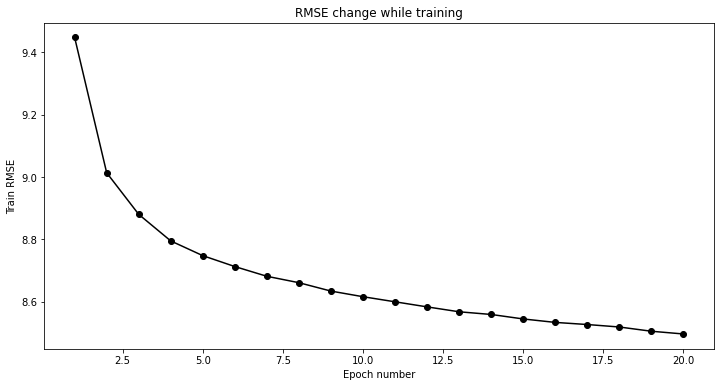

In [20]:
train(model, optimizer, criterion, train_loader)

In [21]:
test(model, criterion, test_loader)

Test RMSE: 8.762039



array([[2000.8933],
       [2003.0854],
       [2002.19  ],
       ...,
       [2000.57  ],
       [2003.2236],
       [2002.402 ]], dtype=float32)

In [22]:
assert test(model, criterion, test_loader).shape[0] == y_test.shape[0]

Test RMSE: 8.762039



## Задание 2. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

**1. Первая попытка - данные без предобработки**

Первый запуск модели я сделала без масштабирования данных, использовала средства, которые подсказали в канале ИАДа)). Jптимайзер Adam с learning rate = 0.0001, два полносвязных слоя, нелинейность ReLU между ними. Количество эпох выставила 10, размер батча на трейне 128 и на тесте = len(y_test). Ширина слоев : 90 - 90 - 1. Отслеживала ошибку (RMSE) на трейне, она падала примерно с 550 до 120, на тесте - около 135. Также модель тяготела к константному прогнозу (год 1996-1997). 

**2. Применяю машстабирование к данным**

Сделала простую предобработку данных с помощью StandardScaler - и на признаках, и на целевой переменной (тоже совет из канала). После этого RMSE на тесте снизилась примерно до 8.9 - 9.0.

**3. Ширина слоев**

Дальше я работала со слоями в модели, во-первых добавила третий, во вторых меняла по-разному ширину (типа 90 - 45 - 45 - 1, 90 - 100 - 90 - 1 и прочее). Лучший результат (примерно 8.82) был на архитектуре 90 - 100 - 100 - 1 (+ нелинейность ReLU), оставила такой.

**4. Включаю в модель Dropout**

После предыдущих этапов ошибка моей модели на тесте была равна 8.82, пробую включить в модель дропаут между 1 и 2 слоями и 2 и 3 слоями, параметры дефолтные. Дропаут увеличивает ошибку до 8.87. Убираю второй дропаут и оставляю только первый (ориентируюсь на то, что пишут тут - https://stats.stackexchange.com/questions/299292/dropout-makes-performance-worse/299305 - что дропаут может портить качество, если его делать перед последним слоем, а также если продолжительность обучения небольшая). Качество немного улучшается, поэтому я увеличиваю кол-во эпох, чтобы проверить, будет ли уменьшаться ошибка при увеличении длительности обучения. Увеличиваю кол-во эпох сначала до 15, затем до 20, ошибка падает. Дальше пробую менять параметр р в дропауте - ставлю 0.2, кол-во эпох остается на 20. После этих изменений ошибка на тесте = 8.762.